# Experimentación métodos iterativos

In [ ]:
import numpy as np
import subprocess as sp
import matplotlib.pyplot as plt
import json
import os

dir_datos = "../data/sistemas"
dir_resultados = "../data/resultados"
dir_tiempos = "../data/tiempos"

if not os.path.exists(f"{dir_resultados}"):
    os.makedirs(f"{dir_resultados}")

if not os.path.exists(f"{dir_datos}"):
    os.makedirs(f"{dir_datos}")

if not os.path.exists(f"{dir_tiempos}"):
    os.makedirs(f"{dir_tiempos}")

## Funciones auxiliares

In [ ]:
n = 10

def correr_algoritmo(tipo, tam, metodo, iteraciones=0, tol=0):        
    proceso = sp.run(["../src/iterativo", f"{dir_datos}/{tipo}_{tam}.txt", metodo, str(iteraciones), str(tol)], capture_output=True, text=True)
    proceso.check_returncode()

    return np.array(proceso.stdout.split(" "), dtype=np.float64)

def cargar_soluciones(tipo, xs):
    for i in range(2, n + 1):
        tam = 2 ** i
        xs.append(np.genfromtxt(f"{dir_datos}/x_{tam}.txt"))

def cargar_soluciones_metodos(metodo):
    with open(f"{dir_resultados}/{metodo}.json", "r") as input:
        return json.load(input)
    
def cargar_tiempos_metodos(metodo):
    with open(f"{dir_tiempos}/{metodo}.json", "r") as input:
        return json.load(input)
    
def guardar_resultados(data, metodo):
    with open(f"{dir_resultados}/{metodo}.json", "w") as output:
        json.dump(data, output)

def guardar_tiempos(data, metodo):
    with open(f"{dir_tiempos}/{metodo}.json", "w") as output:
        json.dump(data, output)

## Correr experimentos

In [ ]:
max_iter = 450
step = 30
tolerancia = 1e-10

tipos = ["edd", "sim", "triang"]

## Soluciones de los métodos

In [ ]:
def obtener_soluciones(dic, metodo):
    for tipo in tipos:
        dic[f"{tipo}"] = []
        for i in range(2, n + 1):
            if metodo != "LU":
                for j in range(1, max_iter + 1, step):
                    res = correr_algoritmo(tipo, 2 ** i, metodo, j, tolerancia)
                    dic[f"{tipo}"].append(res.tolist())
            else:
                res = correr_algoritmo(tipo, 2 ** i, metodo)
                dic[f"{tipo}"].append(res.tolist())

### Jacobi

In [ ]:
resultados_jacobi = {}
obtener_soluciones(resultados_jacobi, "J")
guardar_resultados(resultados_jacobi, "jacobi")

### Jacobi Sumatoria

In [ ]:
resultados_jacobi_sum = {}
obtener_soluciones(resultados_jacobi_sum, "JS")
guardar_resultados(resultados_jacobi_sum, "jacobi_sum")

### Gauss Seidel

In [ ]:
resultados_gs = {}
obtener_soluciones(resultados_gs, "GS")
guardar_resultados(resultados_gs, "gauss-seidel")

### Gauss Seidel Sumatoria

In [ ]:
resultados_gs_sum = {}
obtener_soluciones(resultados_gs_sum, "GSS")
guardar_resultados(resultados_gs_sum, "gauss-seidel_sum")

### LU

In [ ]:
resultados_lu = {}
obtener_soluciones(resultados_lu, "LU")
guardar_resultados(resultados_lu, "lu")

## Cargar vectores solución

In [ ]:
xs_chico = []
xs_mediano = []
xs_grande = []

cargar_soluciones("chico", xs_chico)
cargar_soluciones("mediano", xs_mediano)
cargar_soluciones("grande", xs_grande)

## Cargar soluciones métodos

In [ ]:
sol_j = cargar_soluciones_metodos("jacobi")
sol_js = cargar_soluciones_metodos("jacobi_sum")
sol_gs = cargar_soluciones_metodos("gauss_seidel")
sol_gss = cargar_soluciones_metodos("gauss_seidel_sum")
sol_lu = cargar_soluciones_metodos("lu")


## Tiempo de cómputo para los métodos

In [ ]:
def calcular_tiempos(dic, metodo):
    for tipo in tipos:
        dic[f"{tipo}"] = []
        for i in range(2, n + 1):
            t = %timeit -o correr_algoritmo(tipo, 2 ** i, metodo, max_iter, tolerancia)
            dic[f"{tipo}"].append([t.average, t.stdev])

In [ ]:
tiempos_jacobi = {}
calcular_tiempos(tiempos_jacobi, "J")
guardar_tiempos(tiempos_jacobi, "jacobi")

In [ ]:
tiempos_jacobi_sum = {}
calcular_tiempos(tiempos_jacobi_sum, "JS")
guardar_tiempos(tiempos_jacobi_sum, "jacobi_sum")

In [ ]:
tiempos_gs = {}
calcular_tiempos(tiempos_gs, "GS")
guardar_tiempos(tiempos_gs, "gauss-seidel")

In [ ]:
tiempos_gss = {}
calcular_tiempos(tiempos_gss, "GSS")
guardar_tiempos(tiempos_gss, "gauss-seidel_sum")

In [ ]:
tiempos_lu = {}
calcular_tiempos(tiempos_lu, "LU")
guardar_tiempos(tiempos_gs, "lu")

## Generación de Gráficos

### Error

### Tiempo de cómputo

In [ ]:
tiempos_j = cargar_tiempos_metodos("jacobi")
tiempos_js = cargar_tiempos_metodos("jacobi_sum")
tiempos_gs = cargar_tiempos_metodos("gauss-seidel")
tiempos_gss = cargar_tiempos_metodos("gauss-seidel_sum")
tiempos_lu = cargar_tiempos_metodos("lu")

In [ ]:
tam_matriz = [2 ** i for i in range(2, n + 1)]
algoritmos = ["Jacobi", "Jacobi Sum", "Gauss-Seidel", "Gauss-Seidel Sum"]
nombre_tipos = { "edd": "Estrictamente diagonal dominante", "sim": "Simétrica", "triang": "Triangular inferior"}

def graficar_tiempos(tipo):
    _, ax = plt.subplots()
    
    jacobi = np.array([tiempo[0] for tiempo in tiempos_j[tipo]])
    jacobi_d = np.array([tiempo[1] for tiempo in tiempos_j[tipo]])
    jacobi_sum = np.array([tiempo[0] for tiempo in tiempos_js[tipo]])
    jacobi_sum_d = np.array([tiempo[1] for tiempo in tiempos_js[tipo]])
    gs = np.array([tiempo[0] for tiempo in tiempos_gs[tipo]])
    gs_d = np.array([tiempo[1] for tiempo in tiempos_gs[tipo]])
    gss = np.array([tiempo[0] for tiempo in tiempos_gss[tipo]])
    gss_d = np.array([tiempo[1] for tiempo in tiempos_gss[tipo]])

    ax.plot(tam_matriz, jacobi)
    ax.plot(tam_matriz, jacobi_sum)
    ax.plot(tam_matriz, gs)
    ax.plot(tam_matriz, gss)

    ax.fill_between(tam_matriz, jacobi - jacobi_d, jacobi + jacobi_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi_sum - jacobi_sum_d, jacobi_sum + jacobi_sum_d, alpha=0.3)
    ax.fill_between(tam_matriz, gs - gs_d, gs + gs_d, alpha=0.3)
    ax.fill_between(tam_matriz, gss - gss_d, gss + gss_d, alpha=0.3)

    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title(f"{nombre_tipos[tipo]}")
    ax.legend(algoritmos)
    
    plt.show()

In [ ]:
graficar_tiempos("edd"), graficar_tiempos("sim"), graficar_tiempos("triang")

### LU

In [367]:
tam_matriz = [2 ** i for i in range(2, n + 1)]

def graficar_lu():
    _, ax = plt.subplots()
    for tipo in tipos:
        lu = np.array([tiempo[0] for tiempo in tiempos_j[tipo]])
        ax.plot(tam_matriz, lu)
    
    for tipo in tipos:
        lu = np.array([tiempo[0] for tiempo in tiempos_j[tipo]])
        lu_d = np.array([tiempo[1] for tiempo in tiempos_j[tipo]])
        ax.fill_between(tam_matriz, lu - lu_d, lu + lu_d, alpha=0.3)
    
    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title("Factorización LU")
    ax.legend(tipos)

    plt.show()


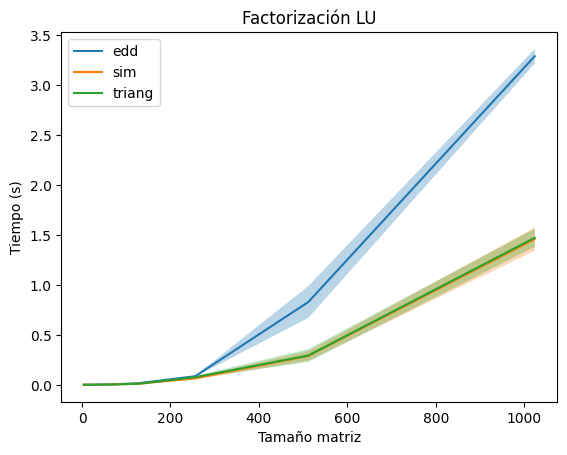

In [368]:
graficar_lu()

### LU vs Métodos Iterativos

In [369]:
tam_matriz = [2 ** i for i in range(2, n + 1)]
tipos = ["LU", "Jacobi", "Jacobi Sum", "Gauss-Seidel", "Gauss-Seidel Sum"]

def graficar_vs():
    _, ax = plt.subplots()

    lu = np.array([tiempo[0] for tiempo in tiempos_j["edd"]])
    lu_d = np.array([tiempo[1] for tiempo in tiempos_j["edd"]])
    jacobi = np.array([tiempo[0] for tiempo in tiempos_j["edd"]])
    jacobi_d = np.array([tiempo[1] for tiempo in tiempos_j["edd"]])
    jacobi_sum = np.array([tiempo[0] for tiempo in tiempos_js["edd"]])
    jacobi_sum_d = np.array([tiempo[1] for tiempo in tiempos_js["edd"]])
    gs = np.array([tiempo[0] for tiempo in tiempos_gs["edd"]])
    gs_d = np.array([tiempo[1] for tiempo in tiempos_gs["edd"]])
    gss = np.array([tiempo[0] for tiempo in tiempos_gss["edd"]])
    gss_d = np.array([tiempo[1] for tiempo in tiempos_gss["edd"]])

    ax.plot(tam_matriz, lu)
    ax.plot(tam_matriz, jacobi)
    ax.plot(tam_matriz, jacobi_sum)
    ax.plot(tam_matriz, gs)
    ax.plot(tam_matriz, gss)

    ax.fill_between(tam_matriz, lu - lu_d, lu + lu_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi - jacobi_d, jacobi + jacobi_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi_sum - jacobi_sum_d, jacobi_sum + jacobi_sum_d, alpha=0.3)
    ax.fill_between(tam_matriz, gs - gs_d, gs + gs_d, alpha=0.3)
    ax.fill_between(tam_matriz, gss - gss_d, gss + gss_d, alpha=0.3)
    
    
    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title("Factorización LU vs Iterativos (edd)")
    ax.legend(tipos)

    plt.show()

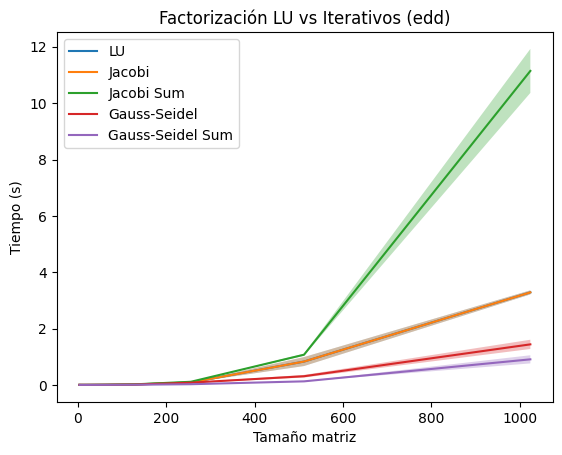

In [370]:
graficar_vs()